In [74]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

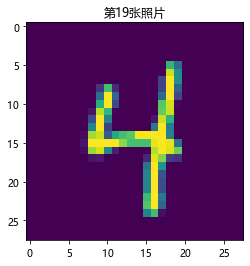

In [75]:
import torch 
from torch import nn
from torch.utils.data import Dataset
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

class Minist_dataset(Dataset):
    def __init__(self,cvs_file):
        self.data_df = pd.read_csv(cvs_file,header=None)
    def __len__(self):
        return len(self.data_df)
    def __getitem__(self,index):
        label = self.data_df.iloc[index,0]
        target = torch.zeros((10))
        target[label] = 1.0
        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values)/255.0
        return target,image_values,torch.FloatTensor(label)
    def plot_image(self,index):
        image = self.data_df.iloc[index,1:].values.reshape(28,28)
        plt.imshow(image)
        plt.title('第%d张照片'%index)
        
mnist = Minist_dataset(r'D:\浏览器下载\mnist_test (1).csv')
mnist.plot_image(19)

In [76]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator,self).__init__()
        self.model = nn.Sequential(nn.Linear(784+10,200),
                                    nn.LeakyReLU(0.02),
                                    nn.LayerNorm(200),
                                   nn.Linear(200,1),
                                   nn.Sigmoid())
        self.loss = nn.BCELoss()
        self.optimizer = torch.optim.Adam(self.parameters(),lr=0.001)
        self.counter = 0
        self.loss_ = []
    def forward(self,img,label):
        x = torch.cat((img,label))
        return self.model(x)
    
    def train(self,inputs,label,targets):
        outputs = self.forward(inputs,label)
        loss = self.loss(outputs,targets)
        self.counter += 1
        if self.counter % 10 == 0:
            self.loss_.append(loss.item())
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
    def plot_loss(self):
        plt.plot(self.loss_)
        plt.show()
        
def generate_random(size):
    random = torch.randn(size)
    return random
def generate_random_label(size):
    label = torch.zeros(size)
    index = np.random.randint(size-1)
    label[index] = 1
    return label


In [77]:
img = generate_random((1,100))
label = generate_random((1,10))
torch.cat((img,label),dim=1).shape
np.random.randint(1)

torch.Size([1, 110])

0

In [78]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator,self).__init__()
        self.model = nn.Sequential(nn.Linear(100+10,200),
                                   nn.LeakyReLU(0.02),
                                   nn.LayerNorm(200),
                                   nn.Linear(200,784),
                                   nn.Sigmoid())
        self.counter = 0
        self.progress = []
        
        self.optimizer = torch.optim.Adam(self.parameters(),lr=0.001)
    def forward(self,seed,label):
        x = torch.cat((seed,label))
        return self.model(x)
    def train(self,D,inputs,label,targets):
        g_outputs = self.forward(inputs,label)
        d_outputs = D.forward(g_outputs,label)
        loss = D.loss(d_outputs,targets)
        
        self.counter += 1
        if self.counter%10 == 0:
            self.progress.append(loss.item())
            
        if self.counter%1000 == 0:
            print('counter = ',self.counter)
            
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
    def plot_progress(self):
        df = pd.DataFrame(self.progress,columns=['loss'])
        df.plot(ylim=(0),figsize=(16,8),alpha=0.1,marker='.',grid=True,yticks=(0,0.25,0.25))
    
        

In [79]:
G = Generator().cuda()
D = Discriminator().cuda()
for _ in range(5):
    for target_tensor,image_data_tensor,label in mnist:
        image_data_tensor,target_tensor,label = image_data_tensor.cuda(),target_tensor.cuda(),label.cuda()
        D.train(image_data_tensor,target_tensor,torch.FloatTensor([1.0]).cuda())
        label_tensor = generate_random_label(10).cuda()
        D.train(G.forward(generate_random(100).cuda(),label_tensor).detach(),label_tensor,torch.FloatTensor([0.0]).cuda())
        label_tensor = generate_random_label(10).cuda()
        G.train(D,generate_random(100).cuda(),label_tensor,torch.FloatTensor([1.0]).cuda())

counter =  1000
counter =  2000
counter =  3000
counter =  4000
counter =  5000
counter =  6000
counter =  7000
counter =  8000
counter =  9000
counter =  10000
counter =  11000
counter =  12000
counter =  13000
counter =  14000
counter =  15000
counter =  16000
counter =  17000
counter =  18000
counter =  19000
counter =  20000
counter =  21000
counter =  22000
counter =  23000
counter =  24000
counter =  25000
counter =  26000
counter =  27000
counter =  28000
counter =  29000
counter =  30000
counter =  31000
counter =  32000
counter =  33000
counter =  34000
counter =  35000
counter =  36000
counter =  37000
counter =  38000
counter =  39000
counter =  40000
counter =  41000
counter =  42000
counter =  43000
counter =  44000
counter =  45000
counter =  46000
counter =  47000
counter =  48000
counter =  49000
counter =  50000


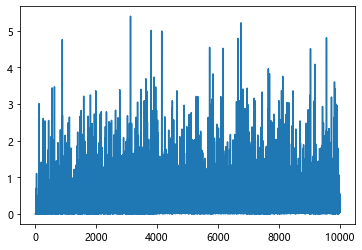

In [80]:
D.plot_loss()

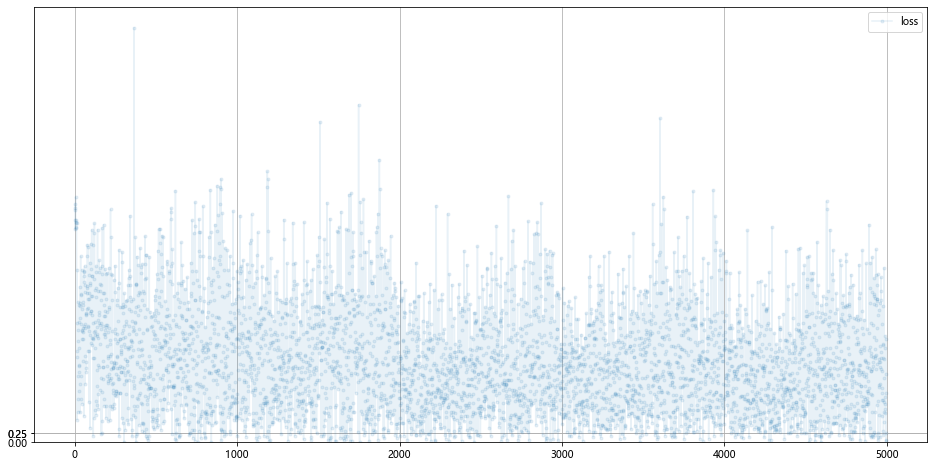

In [81]:
G.plot_progress()

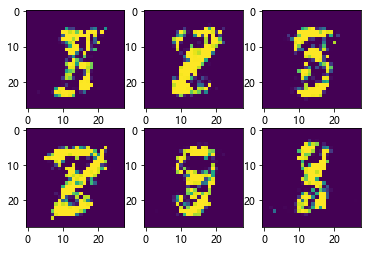

In [83]:
G = G.cpu()
def plot_img(index):
    label = torch.zeros((10))
    label[index] = 1
    for i in range(1,7):
        plt.subplot(2,3,i)
        plt.imshow(G.forward(generate_random(100),label).detach().numpy().reshape(28,28))
    plt.show()
plot_img(8)